<h1>SM_BD_Analysis</h1>

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

<h2>Daten aus Twitter</h2>

<h3>Authentifizierung</h3>

In [2]:
TWITTER_API_KEY='TWITTER_API_KEY'
TWITTER_API_KEY_SECRET='TWITTER_API_KEY_SECRET'
TWITTER_BEARER_TOKEN='TWITTER_BEARER_TOKEN'
TWITTER_ACCESS_TOKEN='TWITTER_ACCESS_TOKEN'
TWITTER_ACCESS_TOKEN_SECRET='TWITTER_ACCESS_TOKEN_SECRET'


twitterParams = {}
twitterfile = open("secrets/twitterParams.txt")
for line in twitterfile:
    keyValue  = line.strip().split("=")
    twitterParams[keyValue[0].strip()] = keyValue[1].strip()


<h3>Nutzen der Tweepy Bibliothek</h3>

In [3]:
client = tweepy.Client(bearer_token=twitterParams[TWITTER_BEARER_TOKEN])

tweet_count = client.get_recent_tweets_count(query='#BTC',granularity='day')

<h3>Preprocessing</h3>

In [4]:
df_btc_tweet_count = pd.DataFrame(tweet_count.data)
df_btc_tweet_count['start']=df_btc_tweet_count['start'].apply(lambda x: x[5:10])


<h3>Visualisierung</h3>

Text(0.5, 0.98, 'Bitcoin-Tweets')

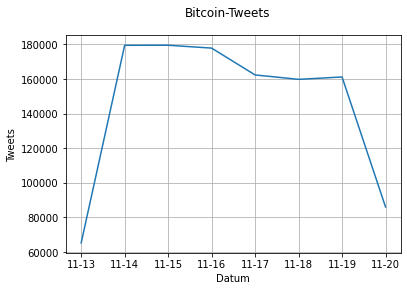

In [5]:
names = df_btc_tweet_count['start']
values = df_btc_tweet_count['tweet_count']

fig, ax = plt.subplots()
ax.plot(names, values)
ax.set_xlabel('Datum')
ax.set_ylabel('Tweets')
ax.grid(True)
fig.suptitle('Bitcoin-Tweets')

In [6]:
import requests

# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
auth = requests.auth.HTTPBasicAuth('CLIENT ID', 'SECRET TOKEN')

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'NAME',
        'password': 'PASSWORT'}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'SM_BD_Analysis/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests

In [10]:
res=requests.get('https://oauth.reddit.com/r/CryptoCurrency/new?limit=100',headers=headers)

df = pd.DataFrame()  # initialize dataframe

for post in res.json()['data']['children']:
    df = df.append({
        'subreddit': post['data']['subreddit'],
        'title': post['data']['title'],
        'selftext': post['data']['selftext'],
        'upvotes': post['data']['ups'],
        'downvotes': post['data']['downs'],
        'created': datetime.fromtimestamp(post['data']['created'])
    }, ignore_index=True)

df.head()

,subreddit,title,selftext,created
0,CryptoCurrency,5 things to know about S’pore-based Crypto.com...,,2021-11-20 15:19:32
1,CryptoCurrency,"ALICE, one of the older NFT games is somehow c...","Hey guys, so I think you are already familiar ...",2021-11-20 15:18:48
2,CryptoCurrency,Do you ever question your lowcap investments o...,This has happened a few times to me. I see a d...,2021-11-20 15:17:35
3,CryptoCurrency,Here's CNBC writting an article on how you can...,,2021-11-20 15:17:11
4,CryptoCurrency,Algorand the next big thing?,Algo was created in 2019 by Silvio Micali who ...,2021-11-20 15:17:07


In [8]:
print(df['created'][0])
timestamp = df['created'][0]
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))
print("test")


1637417855.0
dt_object = 2021-11-20 15:17:35
type(dt_object) = <class 'datetime.datetime'>
test
